In [82]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd

In [83]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean

In [84]:
import nc_time_axis

In [85]:
plt.style.use('seaborn-pastel')

In [86]:
data_baseline = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/DIC_baseline_ensemble1_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [87]:
data_oae = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/DIC_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [88]:
sliced_data_baseline = data_baseline.where((-25 < data_baseline.nav_lon) & (data_baseline.nav_lon < 10) & (35 < data_baseline.nav_lat) & (data_baseline.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [89]:
sliced_data_oae = data_oae.where((-25 < data_oae.nav_lon) & (data_oae.nav_lon < 10) & (35 < data_oae.nav_lat) & (data_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

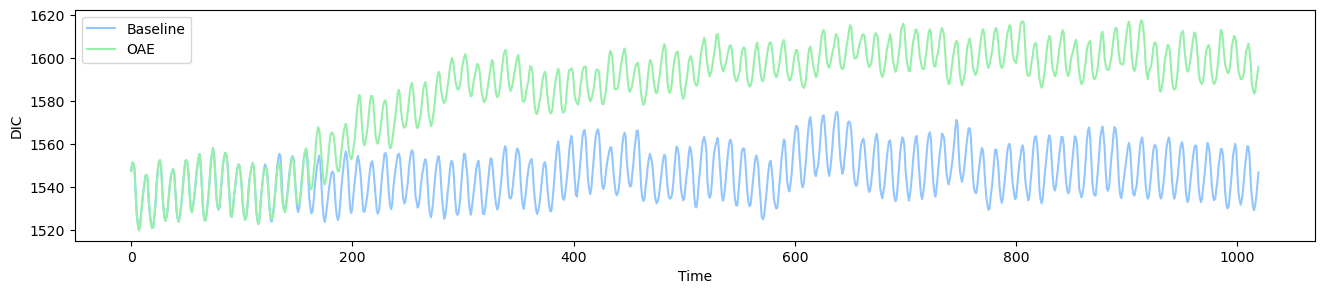

In [135]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_data_baseline.DIC.mean(dim=('y', 'x')), label = 'Baseline')
plt.plot(sliced_data_oae.DIC.mean(dim=('y', 'x')), label = 'OAE')
plt.xlabel("Time")
plt.ylabel("DIC")
plt.legend()
plt.show()

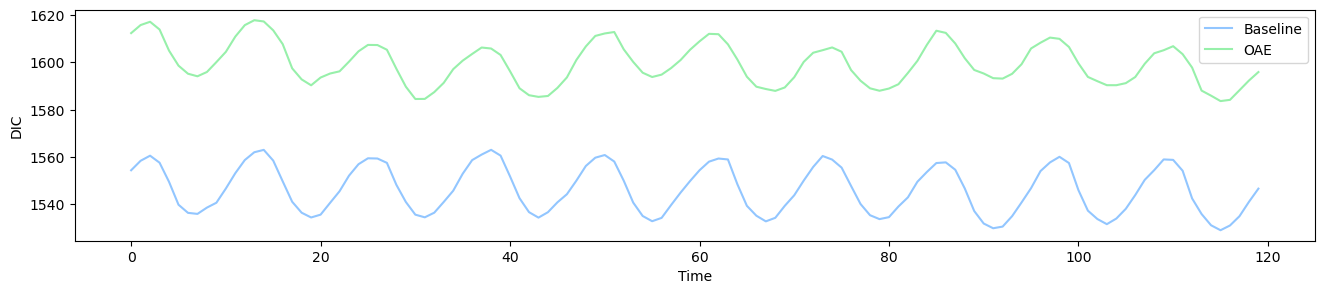

In [136]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_frame_baseline.DIC.mean(dim=('y', 'x')), label = 'Baseline')
plt.plot(sliced_frame_oae.DIC.mean(dim=('y', 'x')), label = 'OAE')
plt.xlabel("Time")
plt.ylabel("DIC")
plt.legend()
plt.show()

In [92]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_baseline = sliced_data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))

In [93]:
dic_season_summary_baseline = dic_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_baseline = dic_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
dic_seasonal_mean_baseline = dic_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [94]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_oae = sliced_data_oae["DIC"].sel(time_counter=slice(start_date, end_date))

In [95]:
dic_season_summary_oae = dic_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_oae = dic_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
dic_seasonal_mean_oae = dic_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


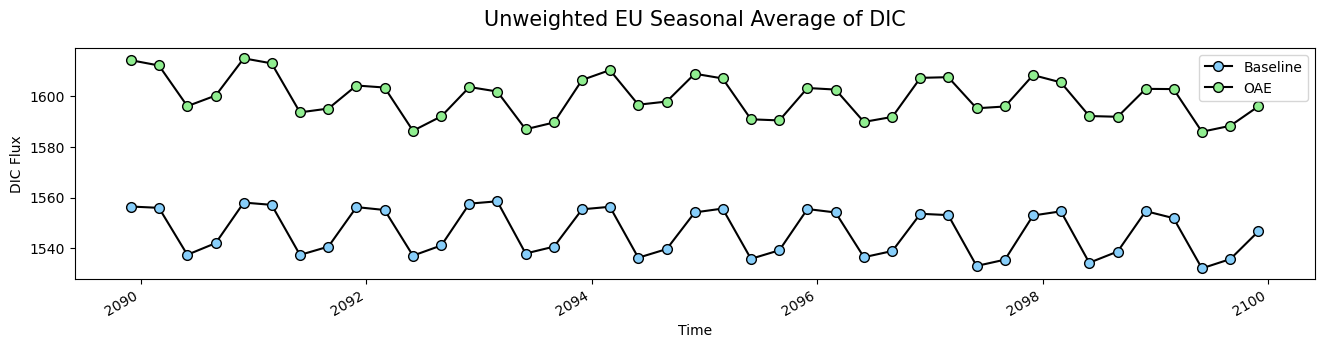

In [137]:
f, ax = plt.subplots(figsize=(16, 3))

dic_seasonal_mean_baseline.plot(marker="o",
                        color="black",
                        markerfacecolor="lightskyblue", markersize=7,
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_seasonal_mean_oae.plot(marker="o",
                        color="black", markersize=7,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of DIC", fontsize= 15, y=1.06)

plt.xlabel("Time")
plt.ylabel("DIC Flux")
plt.legend()
plt.show()

In [97]:
month_length_baseline = dic_baseline.time_counter.dt.days_in_month
dic_weighted_mean_baseline = ((dic_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_baseline = dic_weighted_mean_baseline.where(dic_weighted_mean_baseline)
dic_weighted_season_baseline = dic_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [98]:
month_length_oae = dic_oae.time_counter.dt.days_in_month
dic_weighted_mean_oae = ((dic_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_oae = dic_weighted_mean_oae.where(dic_weighted_mean_oae)
dic_weighted_season_oae = dic_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

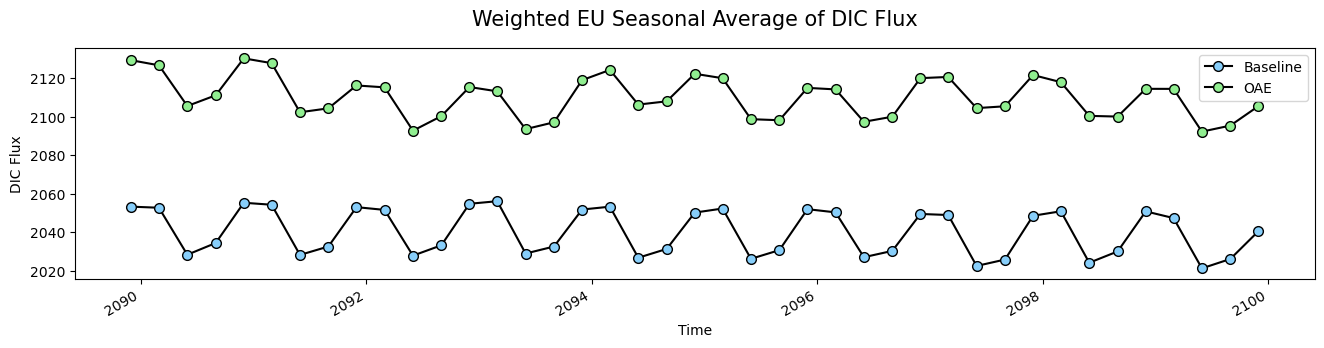

In [138]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(16, 3))
dic_weighted_season_baseline.plot(marker="o", markersize=7,
                        color="black",
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_weighted_season_oae.plot(marker="o", markersize=7,
                        color="black",
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of DIC Flux", fontsize=15, y=1.06)

plt.xlabel("Time")
plt.ylabel("DIC Flux")
plt.legend()
plt.show()

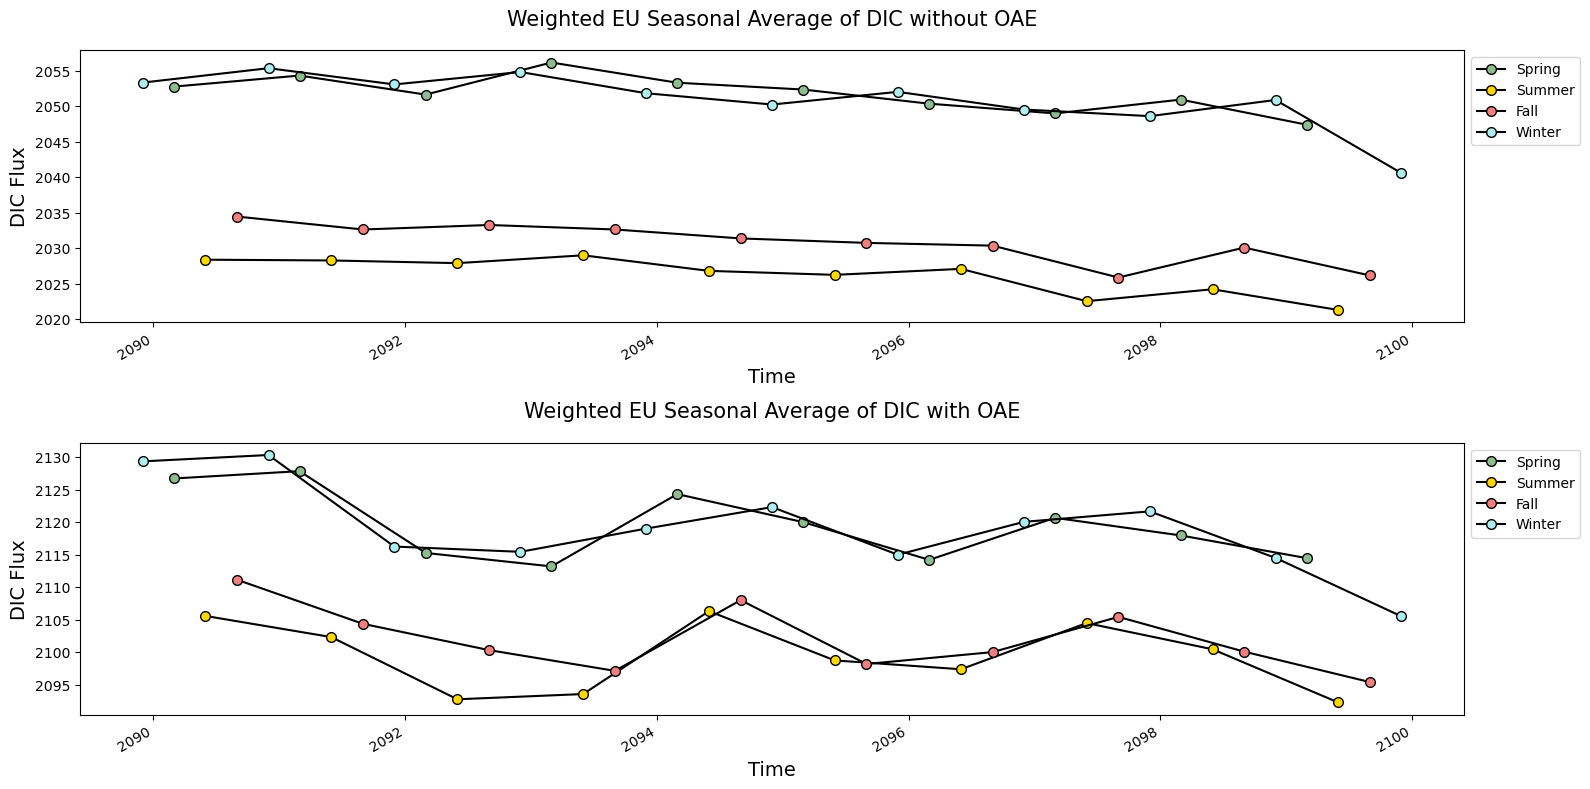

In [134]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in dic_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black",
             marker="o", markersize=7,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of DIC without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC Flux', fontsize=14)

for month, arr in dic_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black",
             marker="o", markersize=7,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Weighted EU Seasonal Average of DIC with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC Flux', fontsize=14)
f.tight_layout()
plt.show()

In [119]:
dic_weighted_baseline = dic_weighted_season_baseline.to_dataframe('DIC_Flux')
dic_weighted_baseline = dic_weighted_baseline.droplevel(1, axis=0)
dic_weighted_baseline['Month'] = pd.DatetimeIndex(dic_weighted_baseline.index).month

In [121]:
conditions = [
    (dic_weighted_baseline['Month'] == 3),
    (dic_weighted_baseline['Month'] == 6),
    (dic_weighted_baseline['Month'] == 9),
    (dic_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_baseline['Month'] = np.select(conditions, values)

In [122]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of DIC Flux without OAE')

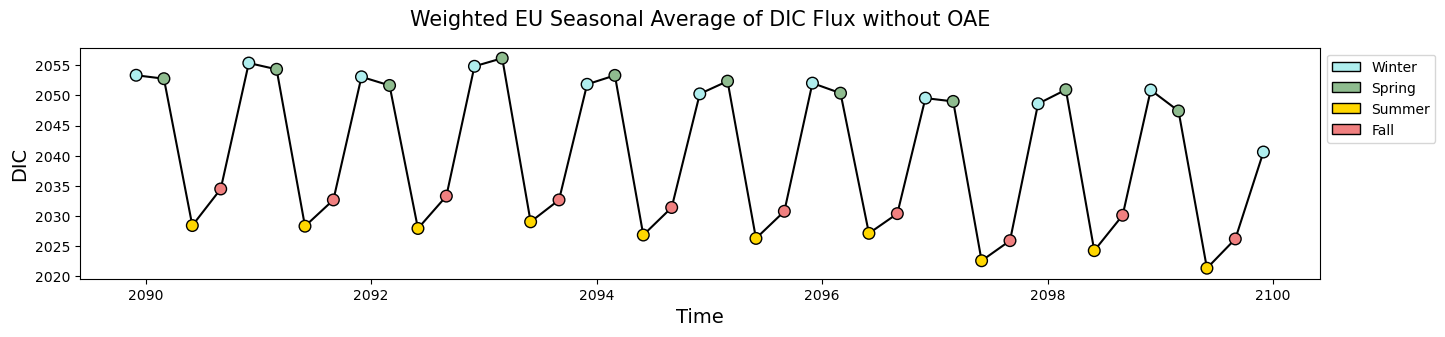

In [132]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black", zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC Flux without OAE", fontsize=15, y=1.06)

In [124]:
dic_weighted_oae = dic_weighted_season_oae.to_dataframe('DIC_Flux')
dic_weighted_oae = dic_weighted_oae.droplevel(1, axis=0)
dic_weighted_oae['Month'] = pd.DatetimeIndex(dic_weighted_oae.index).month

In [125]:
conditions = [
    (dic_weighted_oae['Month'] == 3),
    (dic_weighted_oae['Month'] == 6),
    (dic_weighted_oae['Month'] == 9),
    (dic_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_oae['Month'] = np.select(conditions, values)

In [126]:
colors = dict(zip(dic_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of DIC Flux with OAE')

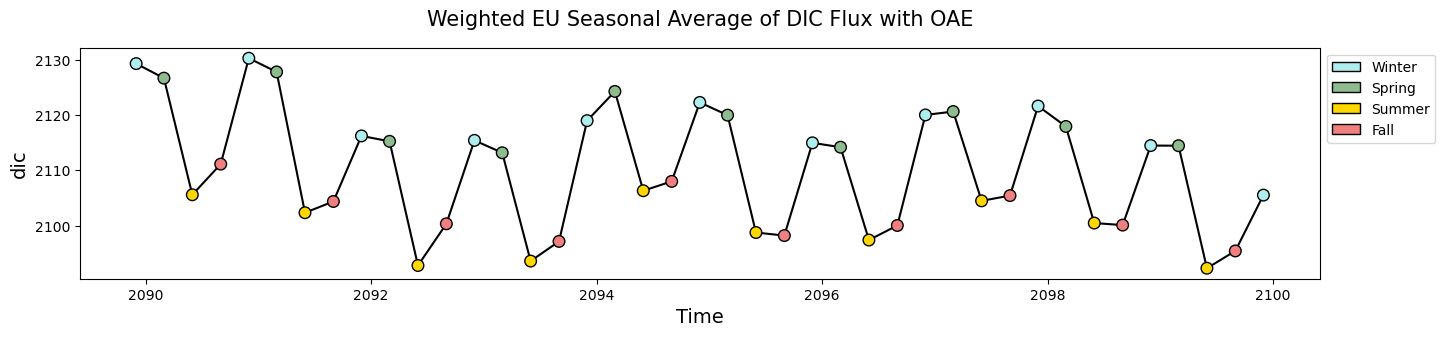

In [131]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black", zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('dic', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC Flux with OAE", fontsize=15, y=1.06)

Text(0.5, 1.06, 'Weighted EU Seasonal Average of DIC')

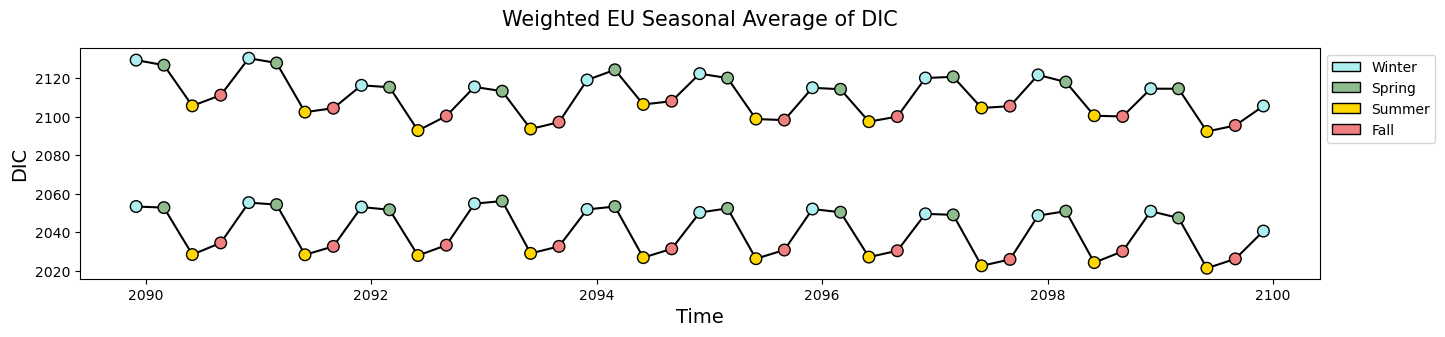

In [129]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black", zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', s=70)

ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black", zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=15, y=1.06)